In [1]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('processed_incident_18months (1).csv')

In [3]:
df.head()

,summary,assignment_group
0,Request to provide access in RSA,INFRA_NETWORK
1,Hardware Update Request,INFRA_EUC_ASSETMGMT
2,Workflow DB - User Access Request - Colleen Ta...,INFRA_DBA
3,Grant access to Talend service account svc_dat...,INFRA_WINTEL
4,Search documents & Outlook for Mark Denyer,INFRA_MESSAGING


In [4]:
df.assignment_group.value_counts()

BPS_SAP_CRM                      10776
L1_SERVICEDESK                    9176
INFRA_EUC                         7758
INFRA_MESSAGING                   5300
INFRA_WINTEL                      4568
APP_SAP_FICA                      4558
SMART BAR                         4554
APP_GEMCAST_NONSAP                3690
APP_GEMCAST_DIGITAL               3195
VENDOR_TELSTRA                    3121
APP_SAP_CRM                       3028
APP_SAP_BILLING                   2339
SMARTBAR_AGLM                     2328
APP_SAP_DEVICE                    2104
INFRA_OCC                         2070
APP_SAP_BASIS                     1885
INFRA_SECURITY                    1884
APP_IAM                           1882
MSS_SAPUAM                        1857
APP_GEMCAST_CORPORATE             1658
APP_SAPSEC                        1590
APP_SAP_CORP                      1560
ONSITE_AGLM                       1436
INFRA_TOOLS                       1293
ONSITE_AGLLY                       877
APP_GRPOPS_SAP           

In [5]:
ag=df.assignment_group
ag

0                     INFRA_NETWORK
1               INFRA_EUC_ASSETMGMT
2                         INFRA_DBA
3                      INFRA_WINTEL
4                   INFRA_MESSAGING
5                         INFRA_EUC
6                      INFRA_WINTEL
7                    L1_SERVICEDESK
8                      INFRA_WINTEL
9               INFRA_EUC_ASSETMGMT
10                     INFRA_WINTEL
11                        INFRA_DBA
12                     INFRA_WINTEL
13                       MSS_SAPUAM
14                  INFRA_MESSAGING
15                   INFRA_SECURITY
16                   INFRA_SECURITY
17                   L1_SERVICEDESK
18                        INFRA_EUC
19                     INFRA_WINTEL
20                     INFRA_WINTEL
21                   L1_SERVICEDESK
22                     INFRA_WINTEL
23                     INFRA_WINTEL
24                        INFRA_EUC
25                        INFRA_DBA
26              INFRA_EUC_ASSETMGMT
27              INFRA_EUC_AS

In [6]:
ag.drop_duplicates(keep='first',inplace=True)

In [7]:
ag_list=ag.values.tolist()
len(ag_list)

166

In [8]:
print(ag_list)

['INFRA_NETWORK', 'INFRA_EUC_ASSETMGMT', 'INFRA_DBA', 'INFRA_WINTEL', 'INFRA_MESSAGING', 'INFRA_EUC', 'L1_SERVICEDESK', 'MSS_SAPUAM', 'INFRA_SECURITY', 'APP_GEMCAST_NONSAP', 'ONSITE_AGLM', 'APP_SAP_FICA', 'APP_GEMCAST_DIGITAL', 'APP_SAP_BILLING', 'INFRA_TOOLS', 'VENDOR_TELSTRA', 'APP_GEMCAST_CORPORATE', 'APP_IAM', 'APP_SAP_CRM', 'SMARTBAR_AGLM', 'SMARTBAR_AGLTI', 'ONSITE_AGLLY', 'APP_CyberArk_Support', 'RTS_SUPPORT', 'SMART BAR', 'APP_SAPSEC', 'APP_SAP_HANA', 'APP_Zscaler_Support', 'APP_SAP_DEVICE', 'INFRA_AZURE_OPERATIONS', 'APP_SAP_XI', 'APP_SAP_BASIS', 'PROJ_ESC_HARDSHIP', 'ONSITE_AGLTI', 'APP_GRPOPS_SAP', 'BPS_SAP_CRM', 'PT3-Sec-App Security', 'GOV_AGLM_IT', 'VENDOR_CANON', 'APP_SAP_ABAP', 'INFRA_IGNIO', 'VENDOR_TELSTRA-MOBILEORDERS', 'SMARTBAR_AGLLY', 'APP_SAP_CORP', 'APP_MDH', 'APP_WORKFLOW', 'APP_SPLUNK', 'INFRA_OCC', 'INFRA_STORAGE', 'INFRA_UNIX', 'APP_RETAILSAP', 'PROJ_DST', 'PROJ_PAPER', 'GOV_TORRENS_ISG', 'APP_GEMCAST_CONNECTNOW', 'Security_SOC', 'APP_DATALAKE', 'SOFTWARE_LI

In [9]:
df.assignment_group.value_counts()

APP_ SAP CAPABILITY REV-TRAC & SALT    1
PT3-Sec-IAM                            1
APP_NEWENERGY_DEVOPS                   1
INFRA_WINTEL                           1
PROJ_DLP                               1
APP_IAMSEC                             1
ONSITE_AGLTI                           1
PT3-Func-FIN                           1
VENDOR_ASTRAL                          1
PT3-Query-Purch                        1
INFRA_EUC_MobiliseIT                   1
PT3-Func-P2P                           1
APP_MDH                                1
APP_SPLUNK                             1
PROJ_CMI                               1
PROJ_EZY CHANGES                       1
PROJ_TDR                               1
PROJ_SHIELD                            1
APP_NEWENERGY_VIRTUALPRODUCTS          1
L1_SERVICEDESK                         1
PROJ_DUPE_BP                           1
GOV_ASSET_MGT                          1
PROJ_PT3                               1
PT3-Query-WM                           1
SMART BAR       

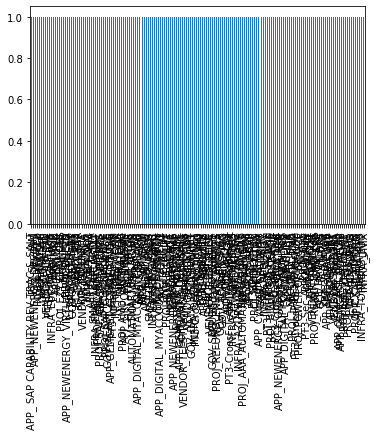

In [10]:
df.assignment_group.value_counts().plot(kind='bar')

In [11]:
def classification_report_df(report):
    report_data=[]
    lines=report.split('\n')
    for line in lines[2:-3]:
        row={}
        line=line.strip(" ")
        row_data=re.compile('\s{3,}').split(line)
        if len(row_data)>3:
            row['class']=row_data[0]
            row['precision']=float(row_data[1])
            row['recall']=float(row_data[2])
            row['f1_score']=float(row_data[3])
            row['support']=float(row_data[4])
            report_data.append(row)
    dataframe=pd.DataFrame.from_dict(report_data)
    return dataframe
        

In [12]:
df.assignment_group.value_counts()

APP_ SAP CAPABILITY REV-TRAC & SALT    1
PT3-Sec-IAM                            1
APP_NEWENERGY_DEVOPS                   1
INFRA_WINTEL                           1
PROJ_DLP                               1
APP_IAMSEC                             1
ONSITE_AGLTI                           1
PT3-Func-FIN                           1
VENDOR_ASTRAL                          1
PT3-Query-Purch                        1
INFRA_EUC_MobiliseIT                   1
PT3-Func-P2P                           1
APP_MDH                                1
APP_SPLUNK                             1
PROJ_CMI                               1
PROJ_EZY CHANGES                       1
PROJ_TDR                               1
PROJ_SHIELD                            1
APP_NEWENERGY_VIRTUALPRODUCTS          1
L1_SERVICEDESK                         1
PROJ_DUPE_BP                           1
GOV_ASSET_MGT                          1
PROJ_PT3                               1
PT3-Query-WM                           1
SMART BAR       

In [13]:
clf=RandomForestClassifier(n_estimators=10)

In [14]:
def preprocess(string):
    string=re.sub('[^a-zA-Z]+',' ', string)
    string=re.sub('\s+', ' ', string)
    tokens=string.split(" ")
    tokens=[word.lower()if not word.isupper() else word for word in tokens ]
    string=','.join(tokens)
    return string

In [15]:
df.head()

,summary,assignment_group
0,Request to provide access in RSA,INFRA_NETWORK
1,Hardware Update Request,INFRA_EUC_ASSETMGMT
2,Workflow DB - User Access Request - Colleen Ta...,INFRA_DBA
3,Grant access to Talend service account svc_dat...,INFRA_WINTEL
4,Search documents & Outlook for Mark Denyer,INFRA_MESSAGING


In [16]:
df.isna().sum()

summary             0
assignment_group    0
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.apply(np.sum)

summary             Request to provide access in RSAHardware Updat...
assignment_group    INFRA_NETWORKINFRA_EUC_ASSETMGMTINFRA_DBAINFRA...
dtype: object

In [19]:
check_if_str=lambda x: type(x)== str

In [20]:
df=df.loc[df.summary.apply(check_if_str)]

In [21]:
df.columns

Index(['summary', 'assignment_group'], dtype='object')

In [22]:
corpus=df.apply(lambda x: preprocess(x.summary), axis=1)

In [23]:
corpus

0                          request,to,provide,access,in,RSA
1                                   hardware,update,request
2            workflow,DB,user,access,request,colleen,taylor
3         grant,access,to,talend,service,account,svc,dat...
4                  search,documents,outlook,for,mark,denyer
5                           microsoft,infopath,installation
6         request,is,to,copy,all,drive,files,from,A,prev...
7         need,local,admin,access,to,the,following,opent...
8         R,program,installation,in,citrix,security,appr...
9               hardware,deployment,request,dylan,field,dev
10        new,relic,agent,not,able,to,push,data,to,APM,f...
11                                          database,access
12                            request,to,creation,of,an,EAR
13                     EIDM,exception,access,request,SAPUAM
14                 deactivate,kellie,benda,s,yammer,account
15        gen,decisioning,platform,account,need,to,be,se...
16            mapped,to,EUC,team,for,ena

In [24]:
from  sklearn.feature_extraction.text import CountVectorizer

In [25]:
def comma_tokenizer(token_list):
    return token_list.split(",")

In [26]:
comma_tokenizer(corpus[])

SyntaxError: invalid syntax (<ipython-input-26-ff0eeba58cf9>, line 1)

In [27]:
count_vect= CountVectorizer(max_features=10000)

In [28]:
x=count_vect.fit_transform(corpus)

In [29]:
y=df.assignment_group

In [30]:
type(x.toarray())

numpy.ndarray

In [32]:
y.value_counts()

BPS_SAP_CRM                      10776
L1_SERVICEDESK                    9176
INFRA_EUC                         7758
INFRA_MESSAGING                   5300
INFRA_WINTEL                      4568
APP_SAP_FICA                      4558
SMART BAR                         4554
APP_GEMCAST_NONSAP                3690
APP_GEMCAST_DIGITAL               3195
VENDOR_TELSTRA                    3121
APP_SAP_CRM                       3028
APP_SAP_BILLING                   2339
SMARTBAR_AGLM                     2328
APP_SAP_DEVICE                    2104
INFRA_OCC                         2070
APP_SAP_BASIS                     1885
INFRA_SECURITY                    1884
APP_IAM                           1882
MSS_SAPUAM                        1857
APP_GEMCAST_CORPORATE             1658
APP_SAPSEC                        1590
APP_SAP_CORP                      1560
ONSITE_AGLM                       1436
INFRA_TOOLS                       1293
ONSITE_AGLLY                       877
APP_GRPOPS_SAP           

In [31]:
from  sklearn.model_selection import train_test_split

In [33]:
x_train, x_test, y_train, y_test=train_test_split(x, y, random_state=1,test_size=0.3)

In [ ]:
import csv
with open("y_act.csv","w",newline="")as f:
    writer = csv.writer(f)
    writer.writerows(y_test)

In [34]:
y_train

2975                    SMARTBAR_AGLM
3627                        SMART BAR
41691                  APP_SAP_DEVICE
26204                    APP_SAP_HANA
23063                     APP_SAP_CRM
101077                    BPS_SAP_CRM
8605                     APP_SAP_FICA
57750                    APP_SAP_FICA
70592                  APP_GRPOPS_SAP
52926              APP_GEMCAST_NONSAP
65277                      APP_SAPSEC
54311                 APP_SAP_BILLING
51231              APP_GEMCAST_NONSAP
84911                 VENDOR_RUTLEDGE
48394                    INFRA_WINTEL
15324                    INFRA_WINTEL
12054                    VENDOR_CANON
67939                 APP_SAP_BILLING
56661                    APP_SAP_CORP
8827                    SMARTBAR_AGLM
10972                    INFRA_WINTEL
59243                  VENDOR_TELSTRA
2414                        SMART BAR
93303                     BPS_SAP_CRM
26646                     BPS_SAP_CRM
81530                     APP_SAP_CRM
34385       

In [35]:
clf.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [36]:
y_pred=clf.predict(x_test)

In [37]:
y_pred=pd.Series(y_pred)
y_pred

0                L1_SERVICEDESK
1                    APP_SAPSEC
2                APP_GRPOPS_SAP
3                L1_SERVICEDESK
4               VENDOR_RUTLEDGE
5                     INFRA_OCC
6                   APP_SAP_CRM
7                   INFRA_TOOLS
8           INFRA_EUC_ASSETMGMT
9                  APP_SAP_FICA
10       APP_GEMCAST_CONNECTNOW
11                 INFRA_WINTEL
12               L1_SERVICEDESK
13                  RTS_SUPPORT
14                    SMART BAR
15                    INFRA_EUC
16                 APP_SAP_FICA
17                    INFRA_EUC
18          APP_GEMCAST_DIGITAL
19                 APP_DATALAKE
20               L1_SERVICEDESK
21                   MSS_SAPUAM
22              PT3-CrossF-Data
23               L1_SERVICEDESK
24                    INFRA_EUC
25                SMARTBAR_AGLM
26                APP_SAP_BASIS
27                  BPS_SAP_CRM
28                  BPS_SAP_CRM
29                 APP_SAP_FICA
                  ...          
30527   

In [ ]:
import csv
with open("y_pred.csv","w",newline="")as f:
    writer = csv.writer(f)
    writer.writerows(y_pred)


In [39]:
#Report

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [40]:
accuracy_score(y_test,y_pred)

0.9547075956409333

In [43]:
cm=confusion_matrix(y_test,y_pred)

In [44]:
import pickle

In [46]:
pickle.dump(clf,open('model03.09.2019.pk','wb'))

In [48]:
count_vect.fit(corpus)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [50]:
pickle.dump(count_vect,open('vectorizer03.09.2019.pk','wb'))